#📌 Extracão

In [4]:
# Importação das bibliotecas
import pandas as pd
import numpy as np

In [5]:
# Leitura o arquivo
df = pd.read_json('/content/TelecomX_Data.json')

In [6]:
# Visualização do DataFrame
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [7]:
# Copiando as 2 primeiras colunas no DataFrame df
df_aux = df[['customerID', 'Churn']].copy()
df_aux.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [8]:
# Normalizando os dados das colunas aninhadas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [9]:
# Concatenando os DataFrames df_aux, df_customer, df_phone, df_internet, df_account
df_normalizado = pd.concat([df_aux, df_customer, df_phone, df_internet, df_account], axis=1)
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
# verificando valores duplicados
df_normalizado.duplicated().unique()

array([False])

In [11]:
# Verificando valores nulos no DF
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [12]:
# Verificando valores vazios não nulos em Churn
df_normalizado['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [13]:
# Temos 224 valores vazios não nulos no Churn, iremos substituí-los e excluí-los.
df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)

In [14]:
# Verificando a transformação dos valores em NaN
#df_normalizado['Churn'].unique()

In [15]:
# Retirando os valores nulos
df_normalizado.dropna(inplace=True)

In [16]:
# Verificando as informações do DF
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [17]:
'''
Transformação da coluna Charges.Total de 'object' para 'float64' Ocorrerá um
erro, pois estamos em uma coluna que contém valores vazios.
'''
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].astype(np.float64)

ValueError: could not convert string to float: ' '

In [18]:
# Utilizaremos o método pd.to_numeric para converter dados vazios em tipo 'float'
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

In [19]:
# Confirmando se temos dados vazios e não vazios
df_normalizado['Charges.Total'].isna().unique()

array([False,  True])

In [20]:
'''
Analisando a coluna 'Charges.Total', que contém os valores NaN, vemos que associada
a coluna 'tenure', que são os meses de contrato, vemos que para estes 11 clientes,
o contrato foi de, no máximo, 1 mês.
'''
df_nan = df_normalizado[df_normalizado['Charges.Total'].isna()][['Charges.Total', 'tenure']]
df_nan

,Charges.Total,tenure
975,NaN,0
1775,NaN,0
1955,NaN,0
2075,NaN,0
2232,NaN,0
2308,NaN,0
2930,NaN,0
3134,NaN,0
3203,NaN,0
4169,NaN,0


In [21]:
# Como as 11 ocorrências representam apenas 0,15% dos dados, optamos por excluí-los.
df_normalizado.dropna(inplace=True)

In [22]:
# Padronizando os nomes das colunas que estão na nomenclatura Pascal Case para Snake Case
df_normalizado.columns = df_normalizado.columns.str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)

In [23]:
# Padronizando as duas últimas colunas que possuem um separador ponto(.)
df_normalizado.columns = df_normalizado.columns.str.replace(r'([a-z]).([A-Z])', r'\1_\2', regex=True)

In [24]:
# Padronizando os rótulos das colunas em letras minúsculas
df_normalizado.columns = df_normalizado.columns.str.lower()

In [25]:
# Criando uma lista para auxiliar na padronização dos dados
lista = df_normalizado.select_dtypes(include=['object']).columns.tolist()

In [26]:
# Deixaremos apenas os dados da coluna 'customerID' em maiúsculas (dados originais)
lista.remove('customer_id')

In [27]:
# Padronizando os dados do tipo string em letras minúsculas
df_normalizado[lista] = df_normalizado[lista].apply(lambda x: x.str.lower())

In [28]:
'''
Definindo uma lista para remover da lista inicial. O intuito é refinar os dados
para serem utilizados na análise, alterando as opções 'yes' e 'no' para 1 e 0
respectivamente.
'''
remover_colunas = ['gender', 'contract', 'payment_method']

lista = [item for item in lista if item not in remover_colunas]

In [29]:
'''
Criando uma segunda lista que contém as opções "yes", "no" e "no internet service".
Posteriormente utilizaremos esta segunda lista para padronizar os dados em "no = 0"
"yes = 1" e "no internet service = 2".
'''
lista_2 = lista[5:12]

In [30]:
'''
Removeremos as colunas que possuem as 3 opções "yes, no e no internet service"
da lista inicial
'''
lista = [item for item in lista if item not in lista_2]

In [31]:
'''
Criar um novo DataFrame para alterar os dados "yes", "no", "no internet service"
e preservar o original
'''
df_final = df_normalizado.copy()

In [32]:
'''
Padronizando os valores "yes" e "no" em que: o 0(zero) indica "no" e o
número 1(um) indica "yes".
'''
for col in lista:
    df_final[col] = df_normalizado[col].replace({'no': 0, 'yes': 1})

/tmp/ipython-input-1464/3794841751.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col] = df_normalizado[col].replace({'no': 0, 'yes': 1})


In [33]:
'''
Padronizando os valores "yes", "no" e "no internet service' em que:
o 0(zero) indica "no", o número 1(um) indica "yes" e 2(dois) indica "no internet service.
'''
for col in lista_2:
    df_final[col] = df_normalizado[col].replace({'no': 0, 'yes': 1, 'no internet service': 2})

/tmp/ipython-input-1464/1633631746.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col] = df_normalizado[col].replace({'no': 0, 'yes': 1, 'no internet service': 2})


In [34]:
# Criando uma nova coluna que nos mostrará os gastos diários do cliente
df_final['contas_diarias'] = round((df_final['charges_monthly'] / 30), 2)

In [35]:
# Criando uma nova coluna que nos mostrará os gastos diários do cliente
df_normalizado['contas_diarias'] = round((df_normalizado['charges_monthly'] / 30), 2)

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   int64  
 11  online_backup      7032 non-null   int64  
 12  device_protection  7032 non-null   int64  
 13  tech_support       7032 non-null   int64  
 14  streaming_tv       7032 non-null   int64  
 15  streaming_movies   7032 non-null   int64  
 16  contract           7032 non-n

In [37]:
# Salvando nosso DataFrame normalizado em format .csv
df_final.to_csv('telecom_x_data.csv', index=False)

#📊 Carga e análise

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_normalizado.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,contas_diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.80


In [40]:
df_numericas = df_normalizado.select_dtypes(include=['int64', 'float64'])
df_numericas.head()

,senior_citizen,tenure,charges_monthly,charges_total,contas_diarias
0,0,9,65.6,593.30,2.19
1,0,9,59.9,542.40,2.00
2,0,4,73.9,280.85,2.46
3,1,13,98.0,1237.85,3.27
4,1,3,83.9,267.40,2.80


In [41]:
# Visualizando as estatísticas descritivas
df_numericas.describe()

,senior_citizen,tenure,charges_monthly,charges_total,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159891
std,0.368844,24.545260,30.085974,2266.771362,1.002955
min,0.000000,1.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.587500,401.450000,1.187500
50%,0.000000,29.000000,70.350000,1397.475000,2.340000
75%,0.000000,55.000000,89.862500,3794.737500,2.992500
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [42]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1, AZUL_1, CINZA_1 = "#e23155", "#203f75", "#ebebeb"

In [43]:
# Definindo uma função para salvar os gráficos
def salvar_figura(fig, nome_arquivo, dpi=300):
    fig.tight_layout()
    fig.savefig(nome_arquivo, dpi=dpi, bbox_inches="tight")

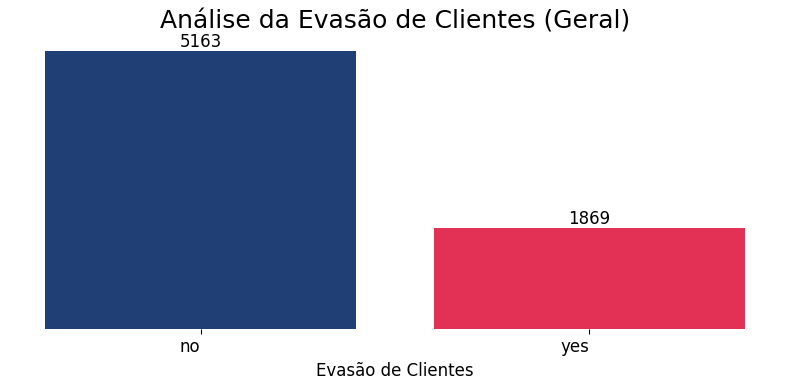

In [44]:
# Visualizando graficamente a evasão dos clientes (Churn)
fig = plt.figure(figsize=(8, 4))
ax = plt.gca() # Get the current axes
churn_counts = df_normalizado['churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values, color=[AZUL_1, VERMELHO_1])

for i, count in enumerate(churn_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Análise da Evasão de Clientes (Geral)', fontsize=18)
plt.xticks(ha='right', fontsize=12)
plt.xlabel('Evasão de Clientes', fontsize= 12)
plt.yticks([])

ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
salvar_figura(fig, 'churn_total.png')

plt.show()

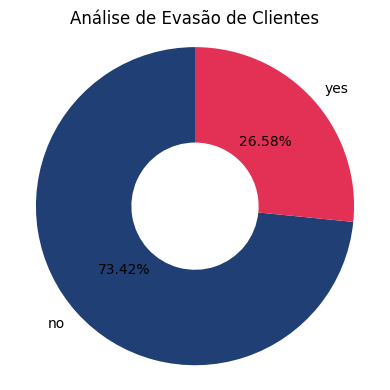

In [45]:
fig = plt.figure(figsize=(4, 4))
plt.pie(df_normalizado['churn'].value_counts(), labels=df_normalizado['churn'].value_counts().index, autopct='%1.2f%%', colors=[AZUL_1, VERMELHO_1], startangle=90, wedgeprops=dict(width=0.6))
plt.title('Análise de Evasão de Clientes')
plt.axis('equal')
salvar_figura(fig, 'churn_total_pie.png')
plt.show()

## Contagem de evasão por variáveis categóricas


### Idade (Sênior Citizen)

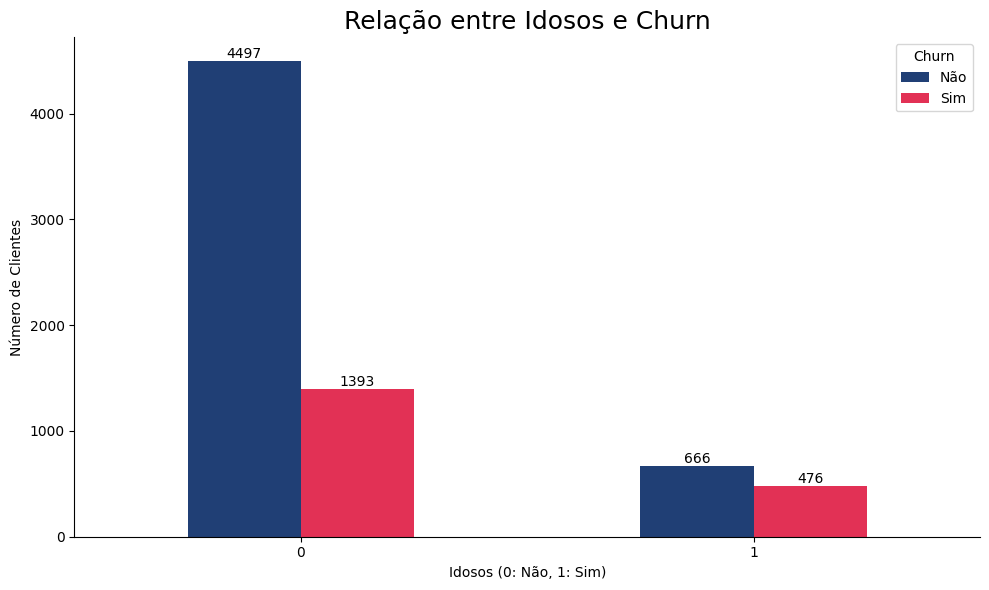

In [46]:
churn_por_idade = pd.crosstab(df_final['senior_citizen'], df_final['churn'])
#display(churn_por_idade)

churn_idosos = churn_por_idade.apply(lambda x: x / x.sum(), axis=1)
#display(churn_idosos)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_por_idade.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Relação entre Idosos e Churn', fontsize= 18)
plt.xlabel('Idosos (0: Não, 1: Sim)')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['right', 'top']].set_visible(False)
salvar_figura(fig, 'churn_por_idade.png') # Save before showing
plt.show()

### Gênero (Gender)

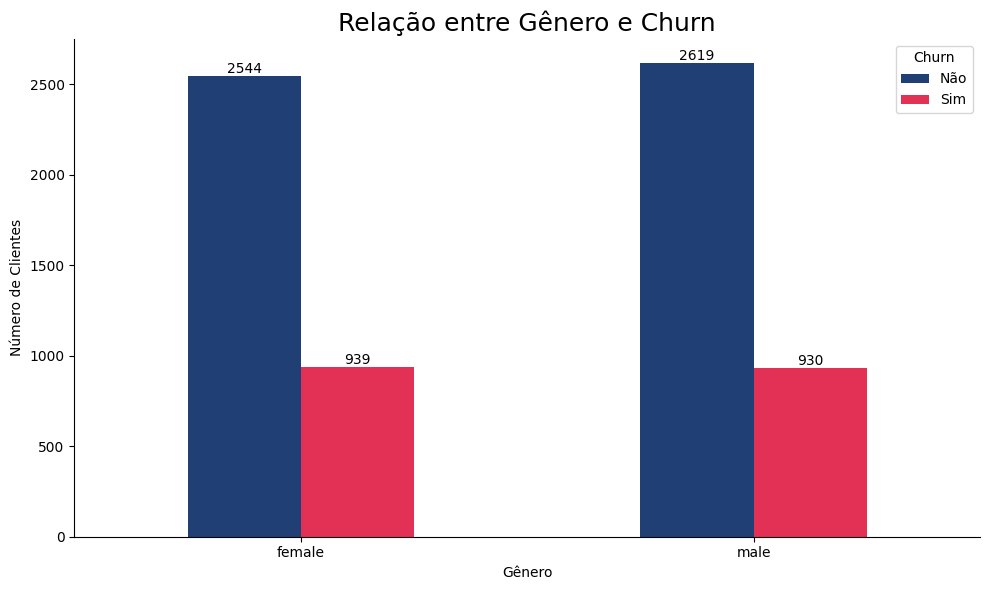

In [47]:
churn_por_genero = pd.crosstab(df_final['gender'], df_final['churn'])
#display(churn_por_genero)

churn_genero = churn_por_genero.apply(lambda x: x / x.sum(), axis=1)
#display(churn_genero)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_por_genero.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Relação entre Gênero e Churn', fontsize=18)
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_por_genero.png') # Save before showing
plt.show()

### Por Tipo de Contrato (Contract)

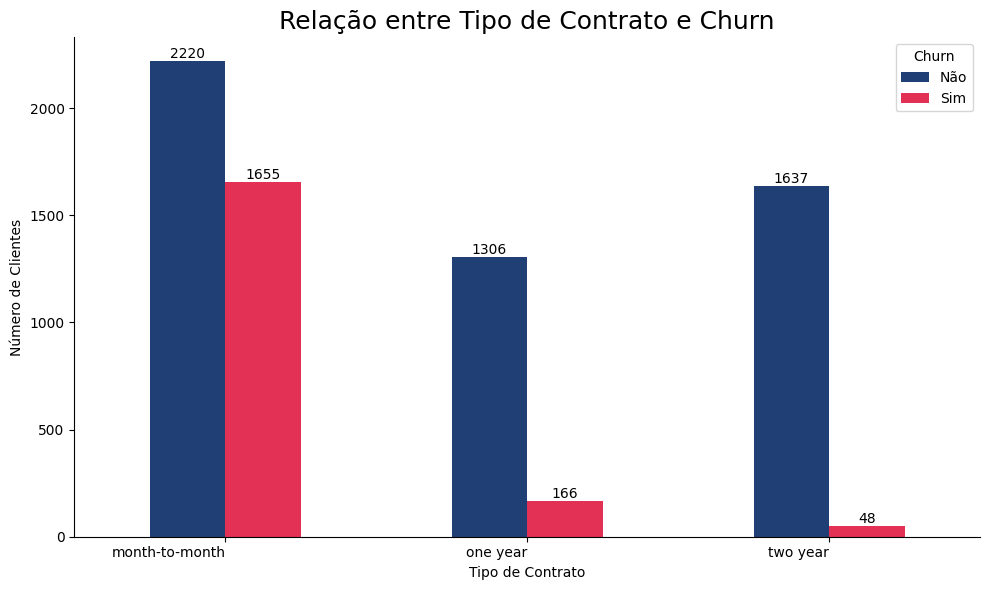

In [48]:
churn_por_contrato = pd.crosstab(df_final['contract'], df_final['churn'])
#display(churn_por_contrato)

churn_contrato = churn_por_contrato.apply(lambda x: x / x.sum(), axis=1)
#display(churn_contrato)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_por_contrato.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Relação entre Tipo de Contrato e Churn', fontsize=18)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_por_contrato.png') # Save before showing
plt.show()

### Por Método de Pagamento (Payment Method)

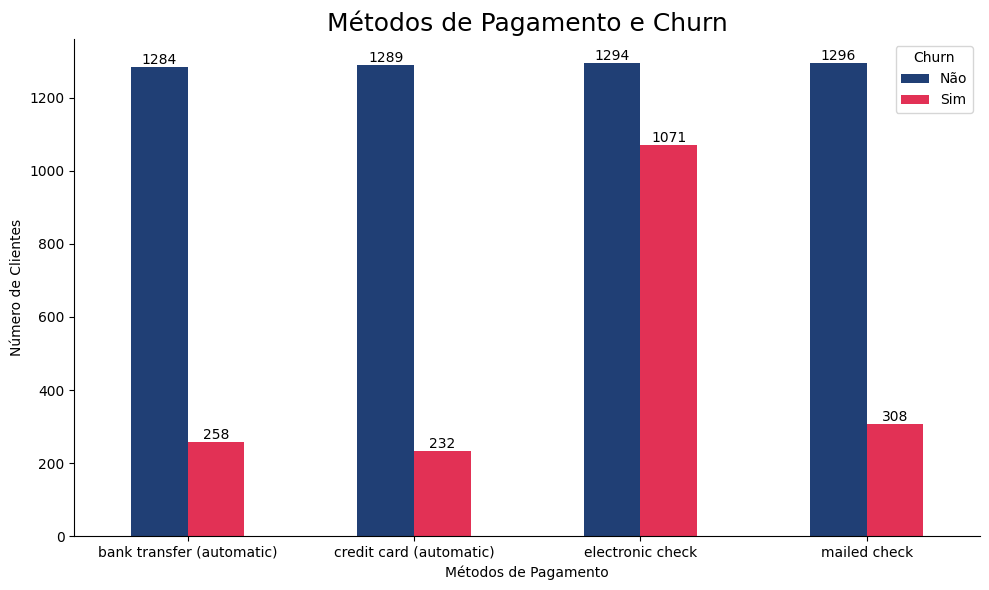

In [49]:
churn_metodo_pagamento = pd.crosstab(df_final['payment_method'], df_final['churn'])
#display(churn_metodo_pagamento)

churn_pagamento = churn_metodo_pagamento.apply(lambda x: x / x.sum(), axis=1)
#display(churn_pagamento)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_metodo_pagamento.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Métodos de Pagamento e Churn', fontsize= 18)
plt.xlabel('Métodos de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation = 0, ha='center')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_por_metodo_pagamento.png') # Save before showing
plt.show()

### Tipo de Cobrança (Paperless Biling)

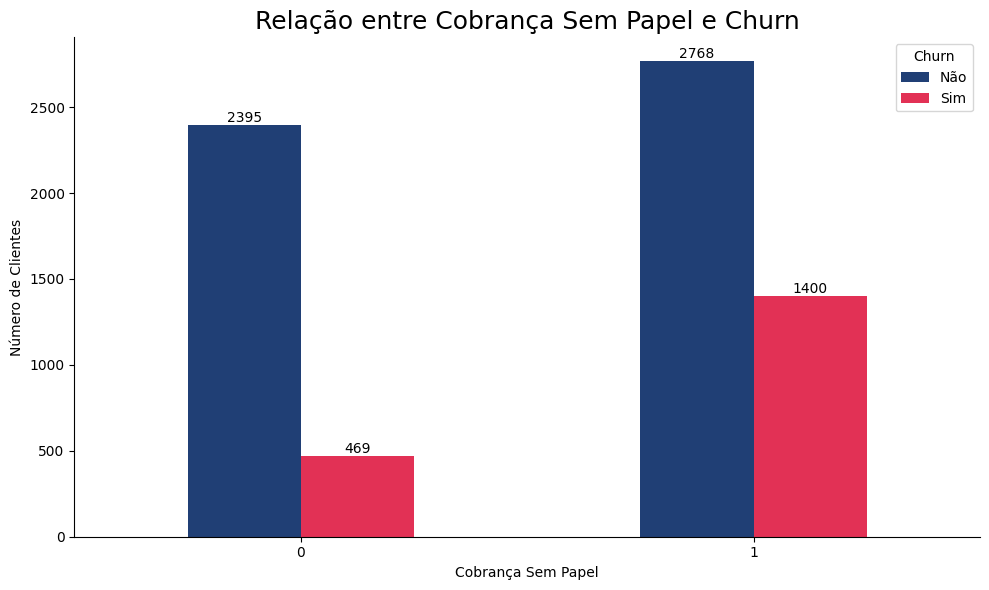

In [50]:
churn_tipo_cobranca = pd.crosstab(df_final['paperless_billing'], df_final['churn'])
#display(churn_tipo_cobranca)

churn_cobranca = churn_tipo_cobranca.apply(lambda x: x / x.sum(), axis=1)
#display(churn_cobranca)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_tipo_cobranca.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Relação entre Cobrança Sem Papel e Churn', fontsize= 18)
plt.xlabel('Cobrança Sem Papel')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_tipo_cobranca.png') # Save before showing
plt.show()

### Streaming TV

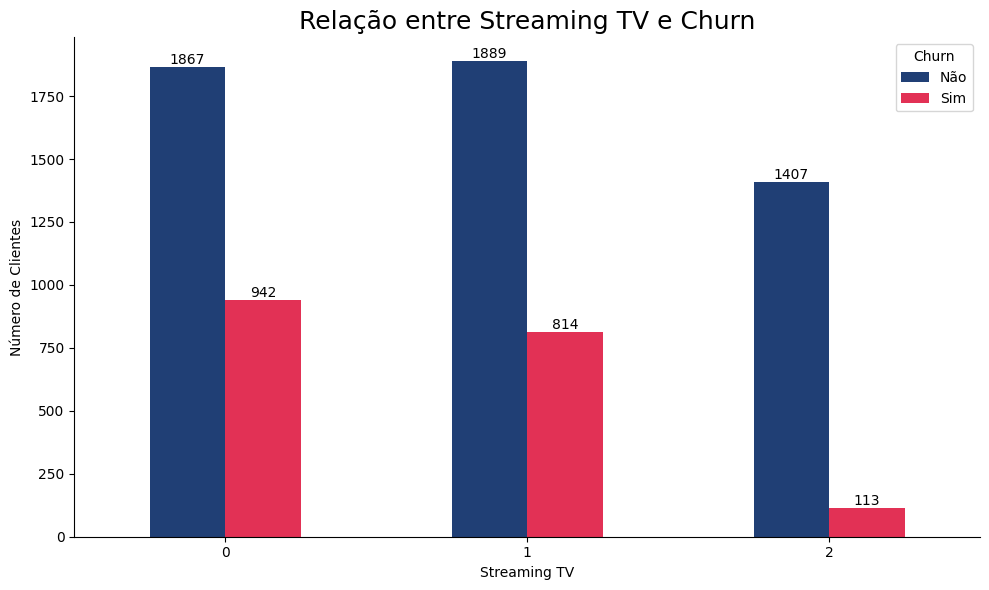

In [51]:
churn_streaming_tv = pd.crosstab(df_final['streaming_tv'], df_final['churn'])
#display(churn_streaming_tv)

churn_streaming = churn_streaming_tv.apply(lambda x: x / x.sum(), axis=1)
#display(churn_streaming)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_streaming_tv.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Relação entre Streaming TV e Churn', fontsize= 18)
plt.xlabel('Streaming TV')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_streaming_tv.png') # Save before showing
plt.show()

### Streaming de Filmes (Streaming Movies)

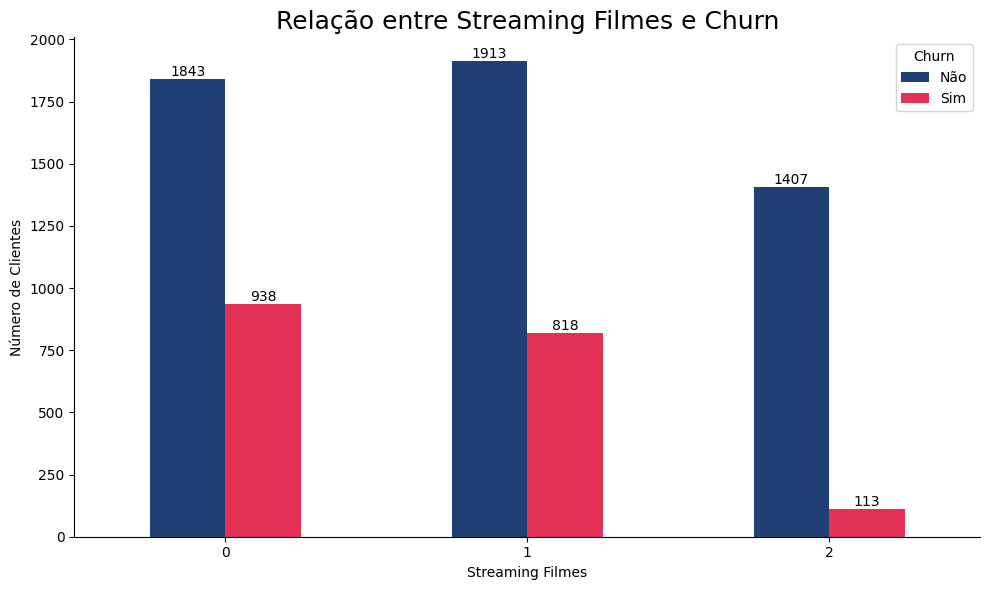

In [52]:
churn_streaming_Filmes = pd.crosstab(df_final['streaming_movies'], df_final['churn'])
#display(churn_streaming_Filmes)

churn_streaming = churn_streaming_Filmes.apply(lambda x: x / x.sum(), axis=1)
#display(churn_streaming)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_streaming_Filmes.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Relação entre Streaming Filmes e Churn', fontsize= 18)
plt.xlabel('Streaming Filmes')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_streaming_Filmes.png') # Save before showing
plt.show()

### Suporte Técnico (Tech Support)

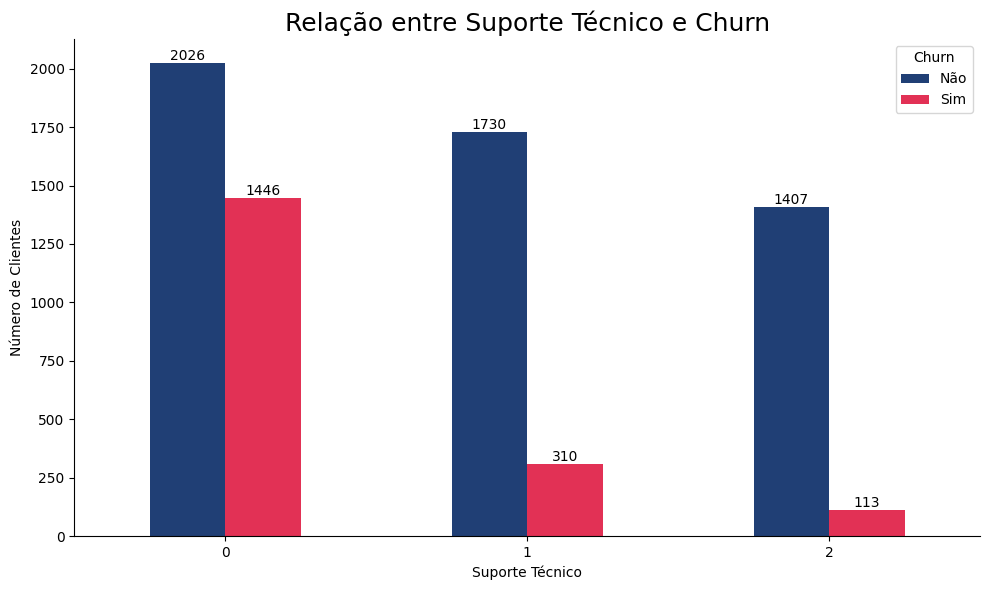

In [53]:
churn_suporte_tecnico = pd.crosstab(df_final['tech_support'], df_final['churn'])
#display(churn_suporte_tecnico)

churn_suport = churn_suporte_tecnico.apply(lambda x: x / x.sum(), axis=1)
#display(churn_suport)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_suporte_tecnico.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Relação entre Suporte Técnico e Churn', fontsize= 18)
plt.xlabel('Suporte Técnico')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_suporte_tecnico.png') # Save before showing
plt.show()

### Serviços de Internet (Internet Services)

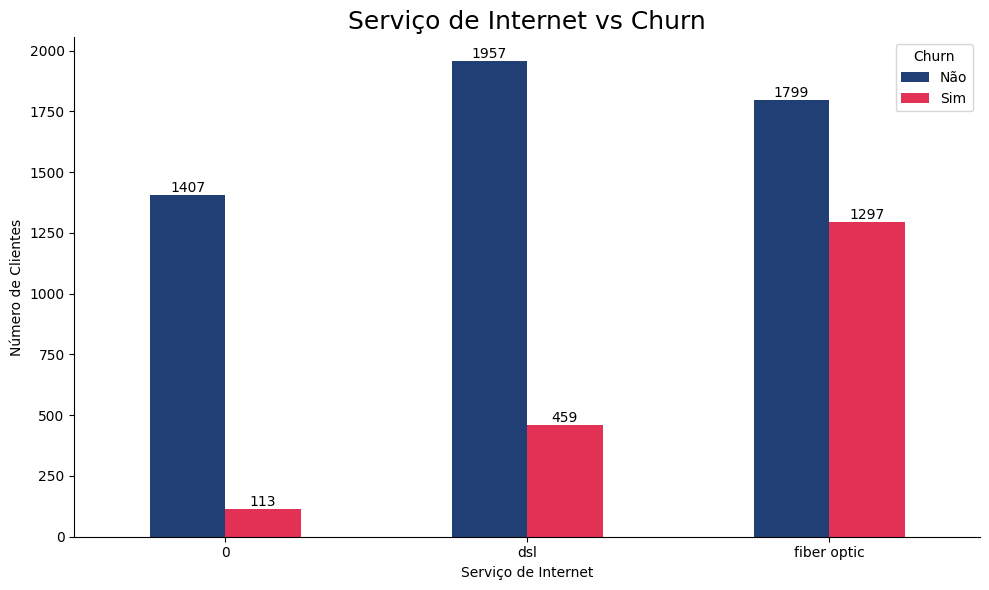

In [54]:
churn_servico_internet = pd.crosstab(df_final['internet_service'], df_final['churn'])
#display(churn_servico_internet)

churn_internet = churn_servico_internet.apply(lambda x: x / x.sum(), axis=1)
#display(churn_internet)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_servico_internet.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Serviço de Internet vs Churn', ha= 'center', fontsize= 18)
plt.xlabel('Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_servico_internet.png') # Save before showing
plt.show()

### Serviços Telefônicos (Phone Services)

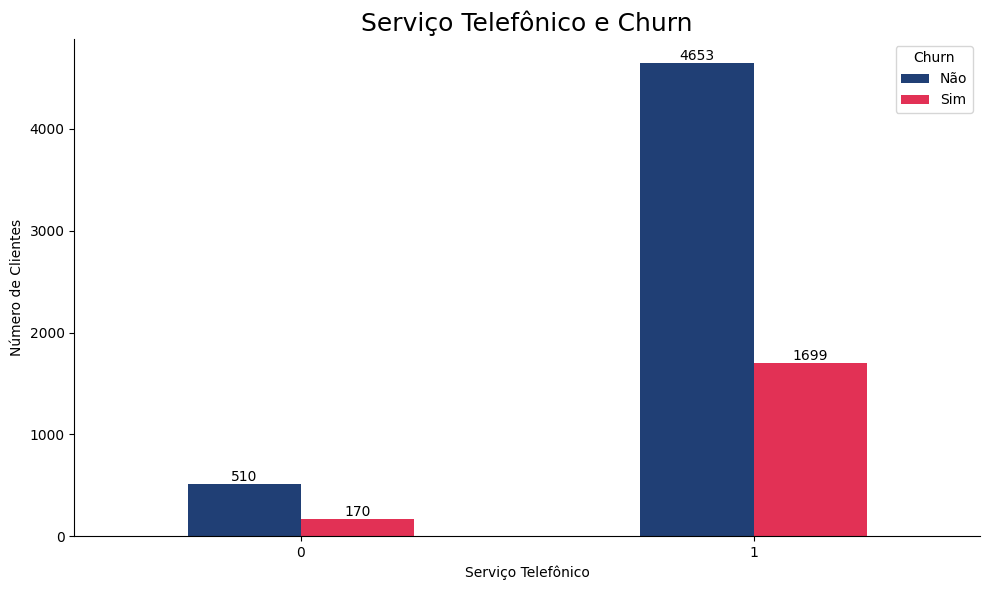

In [55]:
churn_servico_telefonico = pd.crosstab(df_final['phone_service'], df_final['churn'])
#display(churn_servico_telefonico)

churn_total = churn_servico_telefonico.apply(lambda x: x / x.sum(), axis=1)
#display(churn_total)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_servico_telefonico.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Serviço Telefônico e Churn', fontsize= 18)
plt.xlabel('Serviço Telefônico')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_servico_telefonico.png')
plt.show()

### Múltiplas Linhas (Multiple Lines)

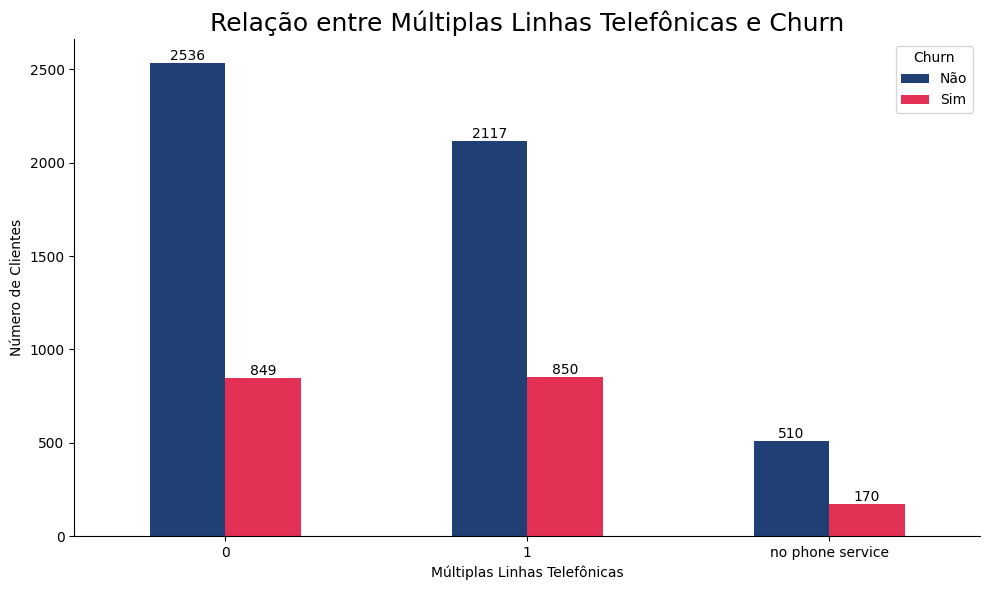

In [56]:
churn_linhas_multiplas = pd.crosstab(df_final['multiple_lines'], df_final['churn'])
#display(churn_linhas_multiplas)

churn_multiplas = churn_linhas_multiplas.apply(lambda x: x / x.sum(), axis=1)
#display(churn_multiplas)

fig, ax = plt.subplots(figsize=(10, 6)) # Use plt.subplots to create figure and axes
churn_linhas_multiplas.plot(kind='bar', ax=ax, color=[AZUL_1, VERMELHO_1]) # Plot on 'ax', remove figsize from here
plt.title('Relação entre Múltiplas Linhas Telefônicas e Churn', fontsize= 18)
plt.xlabel('Múltiplas Linhas Telefônicas')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
ax.spines[['top', 'right']].set_visible(False)
salvar_figura(fig, 'churn_linhas_multiplas.png')
plt.show()

## Contagem de evasão por variáveis numéricas

### Tempo de Contrato (Tenure)

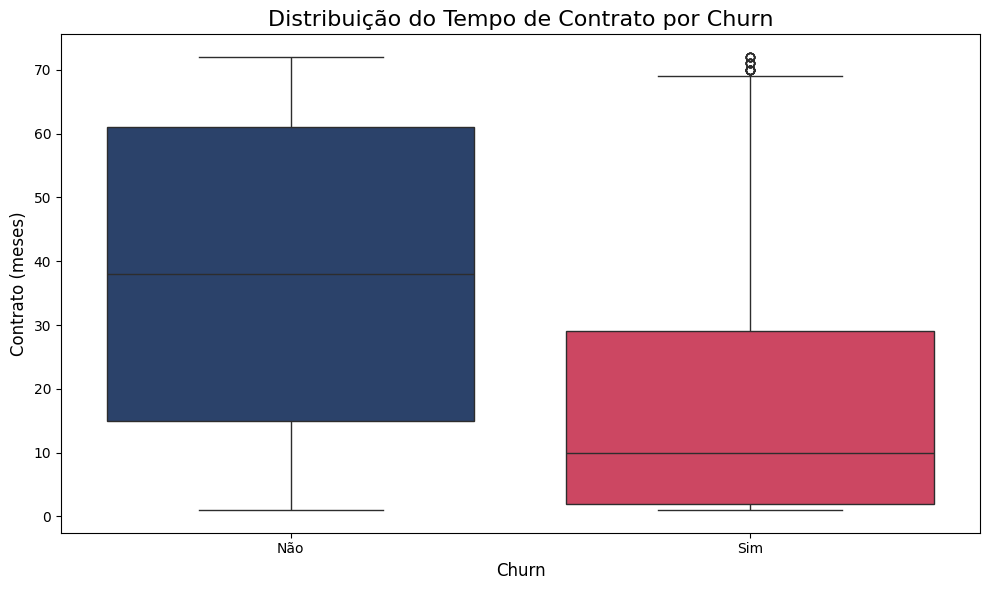

In [57]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='tenure', data=df_final, hue='churn', palette=[AZUL_1, VERMELHO_1], legend=False)
plt.title('Distribuição do Tempo de Contrato por Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Contrato (meses)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'], rotation=0)
plt.tight_layout()
salvar_figura(fig, 'churn_tempo_contrato.png')
plt.show()

### Total Gasto (Charges Total)

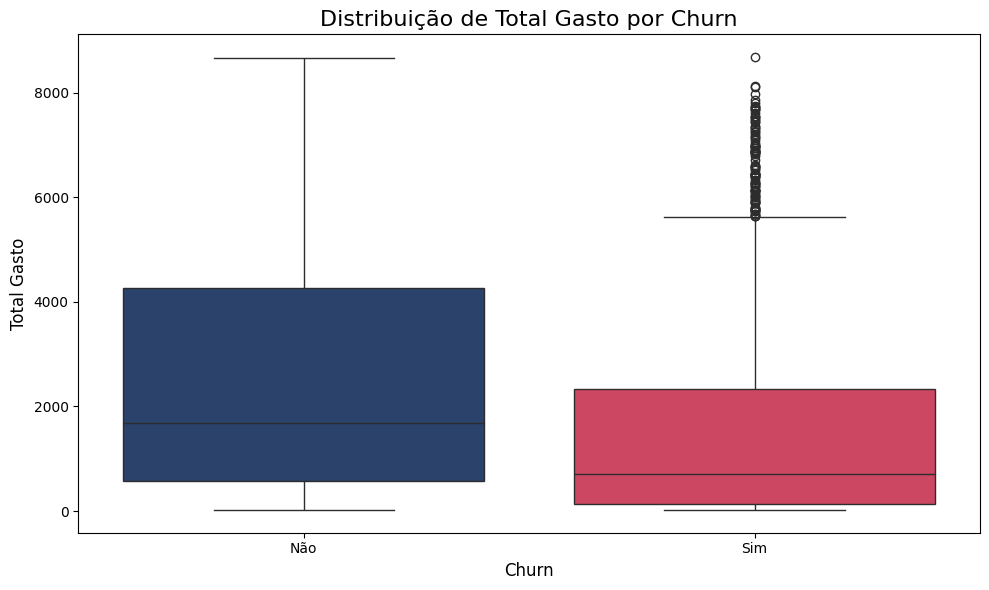

In [58]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='charges_total', data=df_final, hue='churn', palette=[AZUL_1, VERMELHO_1], legend=False)
plt.title('Distribuição de Total Gasto por Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Total Gasto', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'], rotation=0)
plt.tight_layout()
salvar_figura(fig, 'churn_total_gasto.png')
plt.show()

### Contas Diárias

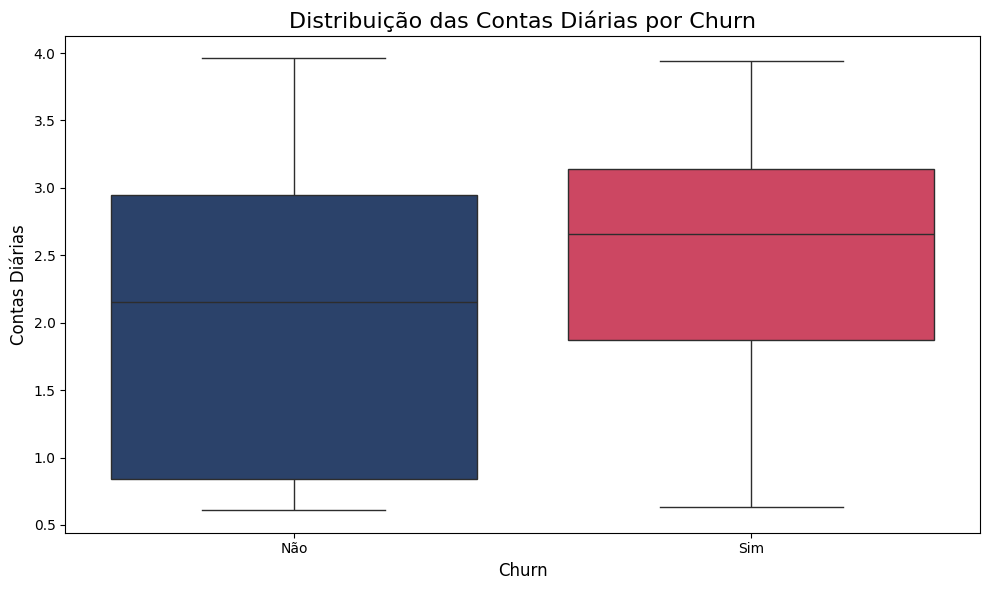

In [59]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='contas_diarias', data=df_final, hue='churn', palette=[AZUL_1, VERMELHO_1], legend=False)
plt.title('Distribuição das Contas Diárias por Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Contas Diárias', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'], rotation=0)
plt.tight_layout()
salvar_figura(fig, 'churn_contas_diarias.png')
plt.show()

# Extra

In [60]:
# Calcular a correlação entre 'churn' e as outras variáveis numéricas
correlacoes = df_final.corr(numeric_only=True)['churn'].sort_values(ascending=False)

correlacoes

,churn
churn,1.000000
contas_diarias,0.192914
charges_monthly,0.192858
paperless_billing,0.191454
senior_citizen,0.150541
phone_service,0.011691
partner,-0.149982
dependents,-0.163128
charges_total,-0.199484
streaming_tv,-0.205246
